In [3]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
def percentage(part,whole):
    return 100 * float(part)/float(whole)
consumerkey=""
consumersecret=""
accesstoken=""
accesstokensecret=""
auth=tweepy.OAuthHandler(consumerkey,consumersecret)
auth.set_access_token(accesstoken,accesstokensecret)
api=tweepy.API(auth)

In [12]:
brands=["mccafe","costa coffee","barista","CCD","starbucks"]
x=[]
y=[]
noofsearchterm=200
#noofsearchterm = int(input("enter the no of tweets to analyse:"))
print("Analysing {} tweets for different coffee brands in Delhi/NCR: \n".format(noofsearchterm))
for b in brands:
    searchterm = b
    tweets=tweepy.Cursor(api.search,q=searchterm,lang="en",geocode="28.64386,77.12373,50km").items(noofsearchterm)
    positive=0
    negative=0
    neutral=0
    polarity=0
    for tweet in tweets:
        #print(tweet.user.location)
        analysis=TextBlob(tweet.text)
        polarity+=analysis.sentiment.polarity
        if(polarity==0):
            neutral+=1
        elif(polarity<0):
            negative+=1
        elif(polarity>0):
            positive+=1
    positive=percentage(positive,noofsearchterm)
    negative=percentage(negative,noofsearchterm)
    neutral=percentage(neutral,noofsearchterm)
    positive=format(positive,'.2f')
    negative=format(negative,'.2f')
    neutral=format(neutral,'.2f')
    #print("How many people are reacting on " + searchterm + " by analysing " + str(noofsearchterm)+ ' tweets.')
    if(polarity==0):
        #print("neutral")
        print(neutral+"% people likes "+searchterm)
        x.append(searchterm)
        y.append(neutral)
    elif(polarity<0):
        #print("negative")
        print(negative+"% people dislikes "+searchterm)
        x.append(searchterm)
        y.append(negative)
    elif(polarity>0):
        #print("positive")
        print(positive+"% people likes "+searchterm)
        x.append(searchterm)
        y.append(positive)

Analysing 100 tweets for different coffee brands in Delhi/NCR: 

0.00% people likes mccafe
0.50% people likes costa coffee
3.00% people dislikes barista
12.00% people likes CCD
29.00% people likes starbucks


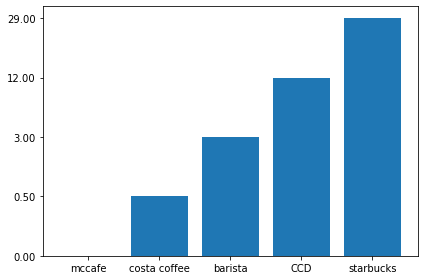

In [13]:
plt.bar(x,y)
plt.tight_layout()
plt.show()

In [14]:
#extracting customers of main competitors of starbucks i.e., CCD and Barista.
competitors=["CCD","barista"]
for i in competitors:
    tweets=tweepy.Cursor(api.search,q=i,lang="en",geocode="28.64386,77.12373,50km").items(100)
    print("\n"+"Customers who prefers "+i+" are:")
    for tweet in tweets:
        print(tweet.user.screen_name)


Customers who prefers CCD are:
the_alchemist92
sumitkashyapjha
Nambitiger1
BhallaDimple
ishtalks
surya9717
theCanonFanboy
sunitakatyal
cool_bindra
khushi_kingdom
Acharyaempire
akadud
AkashK95
cuteushakumari
cuteushakumari
BaneJava
i5achin_
jokeralways24X7
bagla
nvrdefeateddpk
Valprajj
FinancialXpress
Utkarshjha999
vermaaakash10

Customers who prefers barista are:
BiIndia
boss14_bigg
boss14_bigg
biconwoman
Srishtea_
Designer_Banda
